<a href="https://www.kaggle.com/code/duygukranolu/fish-classification-ann?scriptVersionId=203106372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="alert alert-block" style="background-color: #00b7eb;">
  <span style="color:#2c3e50; font-weight: bold; font-size: 26px;"> üé£ Balƒ±k G√∂r√ºnt√º Sƒ±nƒ±flandƒ±rmasƒ±: Derin √ñƒürenme (ANN) Yakla≈üƒ±mƒ±</span>
</div>

<h3>Veri Seti Hakkƒ±nda Bilgiler:</h3>
<ul style="background-color: #e3f2fd; padding: 15px; border-radius: 10px;">
        Bu veri seti, ƒ∞zmir'deki bir s√ºpermarketten toplanan 9 farklƒ± deniz √ºr√ºn√º t√ºr√ºne ait g√∂r√ºnt√ºler i√ßermektedir. Veri seti, ƒ∞zmir Ekonomi √úniversitesi ve bir sanayi kurulu≈üunun i≈ü birliƒüiyle y√ºr√ºt√ºlen √ºniversite-sanayi ortaklƒ±k projesi kapsamƒ±nda toplanmƒ±≈ü ve bu √ßalƒ±≈üma ASYU 2020'de yayƒ±nlanmƒ±≈ütƒ±r. <br>Veri seti, gilt head bream, red sea bream, sea bass, red mullet, horse mackerel, black sea sprat, striped red mullet, trout ve shrimp t√ºrlerine ait g√∂r√ºnt√º √∂rneklerinden olu≈ümaktadƒ±r. 
</ul>

<h3>Proje Yakla≈üƒ±mƒ±:</h3>
<ul style="background-color: #e3f2fd; padding: 15px; border-radius: 10px;">
  Bu projede, balƒ±k t√ºrlerinin sƒ±nƒ±flandƒ±rƒ±lmasƒ± ama√ßlanmaktadƒ±r. Genelde bu t√ºr sƒ±nƒ±flandƒ±rma g√∂revleri i√ßin Convolutional Neural Network (CNN) kullanƒ±lƒ±r. CNN'ler, en kaba haliyle iki ana b√∂l√ºmden olu≈üur:
    <br><li>√ñzellik √áƒ±karƒ±mƒ± (g√∂r√ºnt√ºdeki nesneleri birbirinden ayƒ±rt edebilmek i√ßin anlamlƒ± √∂zellikler olu≈üturma)</li>
    <li>Klasik Sinir Aƒüƒ± Katmanƒ± (elde edilen bu √∂zellikleri kullanarak sƒ±nƒ±flandƒ±rma yapma).</li><br>
   üìå Ancak bu projede, CNN kullanmak yerine yalnƒ±zca Yapay Sinir Aƒüƒ± (ANN) kullanarak sƒ±nƒ±flandƒ±rma yapƒ±lmaktadƒ±r. √ñzellik √ßƒ±karƒ±mƒ± a≈üamasƒ± olmadan, g√∂r√ºnt√ºler doƒürudan ANN'e verilmi≈ü ve balƒ±k t√ºrlerinin doƒüru ≈üekilde sƒ±nƒ±flandƒ±rƒ±lmasƒ± saƒülanmƒ±≈ütƒ±r.
</ul>

<h3>Projenin  Amacƒ±:</h3>
<ul style="background-color: #e3f2fd; padding: 15px; border-radius: 10px;">
Bu projenin amacƒ±, ANN kullanarak balƒ±k t√ºrlerini doƒüru ≈üekilde sƒ±nƒ±flandƒ±rmak ve modelin genelleme kabiliyetini artƒ±rmaktƒ±r. Genelleme kabiliyeti, modelin daha √∂nce g√∂rmediƒüi yeni verileri doƒüru ≈üekilde tahmin edebilme yeteneƒüidir. Ancak, a≈üƒ±rƒ± √∂ƒürenme (overfitting) bu kabiliyeti engelleyebilir. Bu sorunu a≈ümak i√ßin early stopping ve dropout gibi y√∂ntemler kullanƒ±lmƒ±≈ütƒ±r. Ek olarak, hiperparametre optimizasyonu yapƒ±lmƒ±≈ütƒ±r.
</ul>

<a class="anchor" id="import"></a>

## <span style="color:#FA8072">  K√ºt√ºphanelerin Import Edilmesi </span> <a class="anchor" id="import_libraries"></a>

In [1]:
!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import collections

import warnings
warnings.filterwarnings("ignore")

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from scikeras.wrappers import KerasClassifier



from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Rescaling, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.initializers import RandomNormal, RandomUniform, GlorotUniform, GlorotNormal, HeNormal
from keras.optimizers.schedules import ExponentialDecay
from keras_tuner import RandomSearch, GridSearch, BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Veri Setini Okuma </span> <a class="anchor" id="load_data"></a>

In [3]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':
            if dir_name.split()[-1] != 'GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))
                
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
Bu kod, balƒ±k fotoƒüraflarƒ±nƒ±n dosya yollarƒ±nƒ± ve ilgili sƒ±nƒ±f etiketlerini belirler. .png uzantƒ±lƒ± dosyalar ve bu dosyalarƒ±n etiketleri, listelere eklenir. Ardƒ±ndan, bu veriler path ve label s√ºtunlarƒ±na sahip bir pandas DataFrame'e kaydedilir. B√∂ylece, balƒ±k fotoƒüraflarƒ± etiketlenmi≈ü ve model eƒüitimi veya analiz yapmak i√ßin hazƒ±r hale getirilmi≈ü olur.
    <br><br> √ñzetle:  Bu kodun ile balƒ±k fotoƒüraflarƒ±nƒ±n dosya yollarƒ±nƒ± ve etiketlerini i√ßeren bir pandas DataFrame olu≈üturulmu≈ütur.
</p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Ke≈üifsel Veri Analizi </span> <a class="anchor" id="load_data"></a>

In [4]:
# data adlƒ± veri √ßer√ßevesinin ka√ß satƒ±r ve ka√ß s√ºtundan olu≈ütuƒüunu ekrana yazdƒ±rƒ±r
print(f" Count of Rows : {data.shape[0]} \n Count of Columns : {data.shape[1]} ")

# data.shape[0]: Veri √ßer√ßevesindeki toplam satƒ±r sayƒ±sƒ±nƒ±(9000) ifade eder
# data.shape[1]: Veri √ßer√ßevesindeki toplam s√ºtun sayƒ±sƒ±nƒ±(2) ifade eder

 Count of Rows : 9000 
 Count of Columns : 2 


In [5]:
# √ñrnek veri kontrol√º ve veri inceleme
print(data.head())
print(f"Toplam Fotoƒüraf Sayƒ±sƒ±: {len(data)}")
print(f"Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:\n{data['label'].value_counts()}")

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
Toplam Fotoƒüraf Sayƒ±sƒ±: 9000
Sƒ±nƒ±f Daƒüƒ±lƒ±mƒ±:
label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
Veri setimizde toplam 9 farklƒ± balƒ±k t√ºr√º bulunmaktadƒ±r ve her t√ºrden 1000 fotoƒüraf vardƒ±r. <br> Bu, her sƒ±nƒ±fƒ±n e≈üit sayƒ±da g√∂zleme sahip olduƒüunu ve dengeli bir veri seti olduƒüunu g√∂sterir.
    <br>
</p>


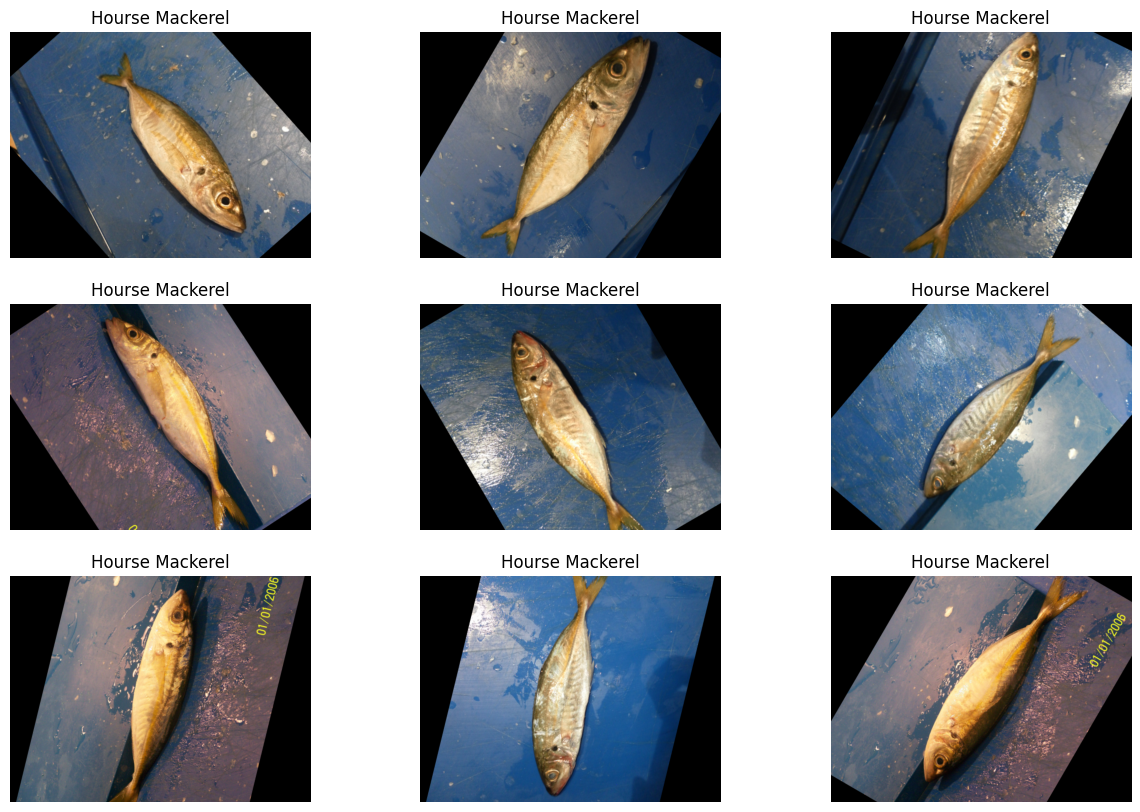

In [6]:
# Bazƒ± √∂rnek g√∂r√ºnt√ºleri g√∂rselle≈ütirme
plt.figure(figsize=(15, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = cv2.imread(data['path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(data['label'][i])
    plt.axis('off')

plt.show()

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  Veri Setini Ayƒ±rma </span> <a class="anchor" id="load_data"></a>

In [7]:
# Veriyi eƒüitim ve test veri setlerine ayƒ±rƒ±r.
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True, random_state=53)

print(train_data.shape)  # Eƒüitim veri setinin satƒ±r ve s√ºtun sayƒ±sƒ±nƒ± g√∂sterir.
print(test_data.shape)   # Test veri setinin satƒ±r ve s√ºtun sayƒ±sƒ±nƒ± g√∂sterir.

(7200, 2)
(1800, 2)


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  <span style="font-weight: bold;"></span>  Veri setimiz, ilk olarak <span style="font-weight: bold;">train_test_split</span> kullanƒ±larak test_size=0.2, %80 eƒüitim ve %20 test olarak ikiye b√∂l√ºn√ºr. Daha sonra <span style="font-weight: bold;"> ImageDataGenerator</span> kullanarak, eƒüitim verisinin %20'sini doƒürulama (validation) seti olarak ayƒ±rƒ±yoruz (validation_split=0.2). Bu sayede:<br><br>
  ‚Ä¢ <span style="font-weight: bold;">Eƒüitim Seti (%64):</span>Modelin √∂ƒürenmesi i√ßin kullanƒ±lƒ±r. Model, bu verilerden sƒ±nƒ±flar arasƒ±ndaki ili≈ükileri √∂ƒürenir ve kendini eƒüitir.<br><br>
  ‚Ä¢ <span style="font-weight: bold;">Doƒürulama Seti (%16):</span>Eƒüitim sƒ±rasƒ±nda modelin performansƒ±nƒ± izleriz. Her eƒüitim d√∂ng√ºs√ºnde modelin ne kadar iyi √∂ƒürendiƒüini g√∂sterir ve a≈üƒ±rƒ± √∂ƒürenme olup olmadƒ±ƒüƒ±nƒ± kontrol ederiz. Doƒürulama seti olmadan, modelin ezber yapƒ±p yapmadƒ±ƒüƒ±nƒ± fark edemez ve bu da yeni verilerde k√∂t√º sonu√ßlara yol a√ßabilir.<br><br>
  ‚Ä¢ <span style="font-weight: bold;">Test Seti (%20):</span>Eƒüitim tamamlandƒ±ktan sonra modelin yeni ve daha √∂nce g√∂rmediƒüi veriler √ºzerindeki ba≈üarƒ±sƒ±nƒ± √∂l√ßmek i√ßin kullanƒ±lƒ±r. Bu set, modelin ger√ßek d√ºnyadaki performansƒ±nƒ± deƒüerlendirmemizi saƒülar.<br><br>
</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;"> <br>
  ‚Ä¢ <span style="font-weight: bold;">random_state=53:</span>Her √ßalƒ±≈ütƒ±rmada aynƒ± veri b√∂lmesini saƒülar, b√∂ylece sonu√ßlar tutarlƒ± olur ve her defasƒ±nda aynƒ± eƒüitim ve test setleri elde edilir.<br>Sayƒ±nƒ±n kendisi √∂zel bir anlam ta≈üƒ±maz; ba≈üka bir sayƒ± da kullanƒ±labilir.<br><br>
  ‚Ä¢ <span style="font-weight: bold;">shuffle=True:</span>Verileri rastgele karƒ±≈ütƒ±rƒ±r, b√∂ylece modelin sƒ±ralƒ± verilere baƒülƒ± kalmasƒ± engellenir ve bu da modelin genelleme kabiliyetini artƒ±rƒ±r. Verilerin homojen daƒüƒ±lƒ±mƒ±nƒ± saƒülar.<br><br>
 
</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
       üüß Eƒüitim ve doƒürulama setlerini ayƒ±rmak i√ßin alternatif olarak, veri setini manuel bir ≈üekilde √º√ß b√∂l√ºme (eƒüitim, doƒürulama, test) ayƒ±rabilirdik. Ancak bu y√∂ntem s√ºreci daha karma≈üƒ±k hale getirebilir. Bunun yerine, ImageDataGenerator kullanarak validation_split parametresiyle doƒürulama setini otomatik olarak ayƒ±rmak, daha pratik ve daha hƒ±zlƒ± bir y√∂ntemdir. Bu nedenle bu y√∂ntemi tercih ediyorum.
</p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072">  √ñn ƒ∞≈üleme ve Veri Akƒ±≈üƒ± Olu≈üturma </span> <a class="anchor" id="load_data"></a>

In [8]:
# ImageDataGenerator Nesnelerinin Olu≈üturulmasƒ±(train_generator, test_generator)
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
   Bu kod ile iki <span style="font-weight: bold;">ImageDataGenerator nesnesi</span> olu≈üturuyoruz: train_generator eƒüitim ve doƒürulama seti i√ßin, test_generator ise test verileri i√ßin kullanƒ±lƒ±yor.<br> Bu nesneler, verilerin normalizasyonunu yaparak modelin anlayabileceƒüi formata d√∂n√º≈üt√ºr√ºr. <span style="font-weight: bold;">preprocessing_function=preprocess_input parametresi</span>, verilerin normalle≈ütirilmesini saƒülar ve bu sayede veriler modelin √∂ƒürenmesi i√ßin uygun hale gelir.<br>
    Ayrƒ±ca, validation_split=0.2 kullanarak, eƒüitim verisinin %20'sini doƒürulama seti olarak ayƒ±rƒ±yoruz. B√∂ylece, aynƒ± train_data seti i√ßinden hem eƒüitim hem de doƒürulama setleri olu≈üturulmu≈ü oluyor.<br>
</p>

<ul style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  <span style="font-weight: bold;">üüß Veri Artƒ±rƒ±mƒ± (Data Augmentation)</span><br> Bu noktada, veriler √ºzerinde herhangi bir veri artƒ±rƒ±mƒ± (data augmentation) yapƒ±lmadƒ±. Sadece normalizasyon i≈ülemi yapƒ±ldƒ±.<br>
      ‚Ä¢ Eƒüer veri artƒ±rƒ±mƒ± yapmak isteseydik, ImageDataGenerator'ƒ±n rotation_range, width_shift_range, height_shift_range gibi ek parametrelerini kullanabilirdik.‚¨áÔ∏è<br><br>

</ul>

In [9]:
# train_generator = ImageDataGenerator(
#    preprocessing_function=preprocess_input, 
#    validation_split=0.2,
#    rotation_range=30,          # D√∂nd√ºrme
#    width_shift_range=0.2,      # Yatay kaydƒ±rma
#    height_shift_range=0.2,     # Dikey kaydƒ±rma
#    zoom_range=0.2,             # Yakƒ±nla≈ütƒ±rma
#    horizontal_flip=True        # Yatay √ßevirme
#)

In [10]:
# Veri Akƒ±≈ülarƒ±nƒ±n Olu≈üturulmasƒ± (flow_from_dataframe)
x_train = train_generator.flow_from_dataframe(dataframe=train_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=53, subset='training')

x_val = train_generator.flow_from_dataframe(dataframe=train_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=53, subset='validation' )

x_test = test_generator.flow_from_dataframe(dataframe=test_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  Bu kod, train_generator ve test_generator nesneleri ile belirli parametreler kullanarak:<br><br>
  ‚Ä¢  <span style="font-weight: bold;">x_train:</span> Modelin eƒüitim s√ºrecinde kullanacaƒüƒ± verilerin akƒ±≈üƒ±nƒ± saƒülar.<br><br>
  ‚Ä¢  <span style="font-weight: bold;">x_val:</span> Doƒürulama seti olarak ayrƒ±lmƒ±≈ü verilerin akƒ±≈üƒ±nƒ± saƒülar.<br><br>
  ‚Ä¢  <span style="font-weight: bold;">x_test:</span> Modelin test seti √ºzerinde performansƒ±nƒ± deƒüerlendirebilmesi i√ßin veri akƒ±≈üƒ±nƒ± olu≈üturur.<br><br>
   üìå Bu akƒ±≈ülar, verilerin modelin anlayabileceƒüi ve i≈üleyebileceƒüi uygun formata getirilmesini saƒülar.
</p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  Veri akƒ±≈ülarƒ± olu≈üturulurken kullanƒ±lan parametreleri inceleyelim. Parametreler ≈üu ≈üekildedir:<br><br>
  ‚Ä¢  <span style="font-weight: bold;">target_size=(224, 224):</span> G√∂r√ºnt√ºlerin boyutunu 224x224 piksel olarak yeniden boyutlandƒ±rƒ±r.<br><br>
  ‚Ä¢  <span style="font-weight: bold;">color_mode='rgb':</span> G√∂r√ºnt√ºleri RGB formatƒ±nda i≈üler.<br><br>
    </p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  Veri setimizdeki hedef deƒüi≈ükenler, yani etiketler, kategorik ve √ßok sƒ±nƒ±flƒ± olarak d√ºzenlenmi≈ütir. Modelin bu sƒ±nƒ±flarƒ± √∂ƒürenebilmesi i√ßin etiketlerin sayƒ±sal bir formata d√∂n√º≈üt√ºr√ºlmesi gerekmektedir. Bu noktada "class_mode" parametresi devreye girer ve √ßok sƒ±nƒ±flƒ± etiketler i√ßin iki se√ßenek sunar: categorical ve sparse:<br><br>
   ‚Ä¢  <span style="font-weight: bold;">class_mode='categorical':</span> One-hot encoding formatƒ±nda sƒ±nƒ±f etiketlerini temsil eder. Yani her sƒ±nƒ±f, yalnƒ±zca o sƒ±nƒ±fƒ± belirten bir vekt√∂rle ifade edilir. √ñrneƒüin, 3 sƒ±nƒ±f varsa bu sƒ±nƒ±flar [1, 0, 0], [0, 1, 0], [0, 0, 1] ≈üeklinde vekt√∂r formunda temsil edilir. Bu durumda kayƒ±p fonksiyonu olarak categorical_crossentropy kullanmanƒ±z gerekmektedir. <br><br>  Diƒüer se√ßeneƒüimiz;  <span style="font-weight: bold;">class_mode='sparse':</span> Sƒ±nƒ±flar tamsayƒ±lar (integer) olarak temsil edilir. Her sƒ±nƒ±f, 0, 1, 2, ... ≈üeklinde sayƒ±sal bir deƒüere kar≈üƒ±lƒ±k gelir. √ñrneƒüin, 5 sƒ±nƒ±fƒ±nƒ±z varsa bu sƒ±nƒ±flar 0, 1, 2, 3, 4 olarak tanƒ±mlanƒ±r. Kayƒ±p fonksiyonu olarak sparse_categorical_crossentropy kullanmanƒ±z gerekir. Bu y√∂ntem, bellekte yerden tasarruf saƒülar ve hesaplama hƒ±zƒ±nƒ± artƒ±rƒ±r. <br><br>
    üìå "Bu projede, class_mode='categorical' se√ßeneƒüini kullanarak modelin etiketlerini one-hot encoding formatƒ±na d√∂n√º≈üt√ºrd√ºm. Buna baƒülƒ± olarak, modelin derlenmesi a≈üamasƒ±nda categorical_crossentropy kayƒ±p fonksiyonunu tercih ettim."<br><br>
    </p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
     ‚Ä¢  <span style="font-weight: bold;">batch_size=32:</span>Model, verileri 32'lik gruplar (batch'ler) halinde i≈üler. Yani, her adƒ±mda model 32 g√∂r√ºnt√ºy√º alƒ±p bu g√∂r√ºnt√ºler √ºzerinde eƒüitimi ger√ßekle≈ütirir. Bu y√∂ntemi kullanmamƒ±zƒ±n sebebi, T√ºm veri setini aynƒ± anda i≈ülemek b√ºy√ºk bir bellek gerektirir. Bu y√ºzden verileri k√º√ß√ºk partiler (batch'ler) halinde i≈ülemek belleƒüi daha verimli kullanmayƒ± saƒülar.<br><br>
Peki batch_size deƒüerini nasƒ±l belirlemeliyiz? üßê<br><br>
     <span style="font-weight: bold;">K√º√ß√ºk batch_size (√∂rneƒüin 16):</span> Modelin daha iyi √∂ƒürenmesini saƒülayabilir, ancak eƒüitim s√ºresi uzar.<br><br>
      <span style="font-weight: bold;">B√ºy√ºk batch_size (√∂rneƒüin 128 veya daha fazla):</span>  Daha hƒ±zlƒ± eƒüitim saƒülar, ancak modelin √∂ƒürenme kapasitesi azalabilir ve a≈üƒ±rƒ± √∂ƒürenme (overfitting) riski artar.<br><br>
      <span style="font-weight: bold;">Denge Saƒülamak:</span> Genellikle 32 veya 64 gibi dengeli bir deƒüer, eƒüitim s√ºresi ve performans a√ßƒ±sƒ±ndan tercih edilir.<br><br>
    </p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
    ‚Ä¢  <span style="font-weight: bold;">shuffle=True/False:</span> <br><br>
     <span style="font-weight: bold;">shuffle=True:</span> Eƒüitim ve doƒürulama verilerini rastgele karƒ±≈ütƒ±rƒ±r. Bu, verilerin homojen bir ≈üekilde daƒüƒ±lmasƒ±nƒ± saƒülar ve modelin her sƒ±nƒ±fƒ± e≈üit derecede √∂ƒürenmesine yardƒ±mcƒ± olur, ezberleme riskini azaltƒ±r.<br><br>
    <span style="font-weight: bold;">shuffle=False:</span> Test verileri karƒ±≈ütƒ±rƒ±lmaz. Bu, modelin ger√ßek performansƒ±nƒ± objektif bir ≈üekilde deƒüerlendirmemizi saƒülar.
    </p>

 <p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
    ‚Ä¢  <span style="font-weight: bold;">seed=53:</span> Rastgele i≈ülemlerin tekrarlanabilirliƒüini saƒülamak amacƒ±yla kullanƒ±lƒ±r, yani her √ßalƒ±≈ütƒ±rmada aynƒ± ba≈ülangƒ±√ß ko≈üullarƒ±nƒ± elde ederiz. Birka√ß √∂rnek vermek gerekirse;<br><br>
    <span style="font-weight: bold;">Verilerin Karƒ±≈ütƒ±rƒ±lmasƒ± (shuffle=True):</span> Eƒüitim ve doƒürulama verilerini karƒ±≈ütƒ±rmak i√ßin shuffle=True kullanƒ±ldƒ±ƒüƒ±nda, veriler her √ßalƒ±≈ütƒ±rmada rastgele olarak farklƒ± sƒ±ralarda olabilir. Ancak seed=42 kullanarak bu rastgeleliƒüi sabitlersek, her √ßalƒ±≈ütƒ±rmada aynƒ± karƒ±≈ütƒ±rma i≈ülemi uygulanƒ±r ve tutarlƒ±lƒ±k saƒülanƒ±r.<br><br>
     <span style="font-weight: bold;">Ba≈ülangƒ±√ß Aƒüƒ±rlƒ±klarƒ±nƒ±n Sabitlenmesi:</span> Modelin ba≈ülangƒ±√ßtaki aƒüƒ±rlƒ±klarƒ± da rastgele belirlenir. Seed kullanarak bu ba≈ülangƒ±√ß aƒüƒ±rlƒ±klarƒ±nƒ± sabitleriz. Bu, her √ßalƒ±≈ütƒ±rmada modelin aynƒ± ba≈ülangƒ±√ß ko≈üullarƒ±na sahip olmasƒ±nƒ± ve tutarlƒ± sonu√ßlar elde edilmesini m√ºmk√ºn kƒ±lar.<br><br>
Eƒüitim s√ºrecinde aƒüƒ±rlƒ±klar her epoch'ta optimize edilerek modelin performansƒ± iyile≈ütirilir. <br><br> 
   üìå<span style="font-weight: bold;">Aƒüƒ±rlƒ±klarƒ±n √∂nemi:</span> √ñƒürenme s√ºreci, modelin hata oranƒ±nƒ± (loss) d√º≈ü√ºrmeye √ßalƒ±≈ümasƒ±dƒ±r. Model, her iterasyonda (epoch) aƒüƒ±rlƒ±klarƒ± ayarlayarak, bu hatayƒ± en aza indirmeyi hedefler. Yani, √∂ƒürenme s√ºreci boyunca ama√ß, aƒüƒ±rlƒ±klarƒ±n en uygun deƒüerlerini bularak modelin performansƒ±nƒ± artƒ±rmaktƒ±r.
    <br><br>    
    üüß <span style="font-weight: bold;">Seed'e benzer bir random_state kullanmƒ±≈ütƒ±k, peki bunlarƒ±n farkƒ± nedir?üßê</span><br><br>
     <span style="font-weight: bold;">seed=53:</span> Genellikle rastgele i≈ülemler (√∂rneƒüin, verilerin karƒ±≈ütƒ±rƒ±lmasƒ±, aƒüƒ±rlƒ±klarƒ±n rastgele ba≈ülatƒ±lmasƒ±) sƒ±rasƒ±nda kullanƒ±lƒ±r.<br><br> 
       <span style="font-weight: bold;">random_state=53:</span> Daha √ßok veri setinin b√∂l√ºnmesi gibi i≈ülemler sƒ±rasƒ±nda kullanƒ±lƒ±r ve veri b√∂l√ºnmesinin her seferinde aynƒ± ≈üekilde yapƒ±lmasƒ±nƒ± saƒülar.<br><br>
--ikisi de rastgelelik fakt√∂r√ºn√º sabitleyerek s√ºrecin tekrar edilebilir olmasƒ±nƒ± saƒülar.<br>
    
  </p>

 <p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
    ‚Ä¢  <span style="font-weight: bold;">subset='training'/'validation':</span> 
train_generator nesnesini kullanarak eƒüitim (training) ve doƒürulama (validation) verilerini ayƒ±rƒ±r.
    </p>

In [11]:
 # Sƒ±nƒ±f daƒüƒ±lƒ±mƒ±nƒ± yazdƒ±rmak i√ßin fonksiyon
def print_class_distribution(dataset, dataset_name):
    train_labels = dataset.classes
    class_counts = collections.Counter(train_labels)
    print(f"{dataset_name} Class Distribution: {class_counts}")
    
    labels_map = {v: k for k, v in dataset.class_indices.items()}
    for class_index, count in class_counts.items():
        print(f"Class '{labels_map[class_index]}': {count}")

In [12]:
# Eƒüitim, doƒürulama ve test veri setlerinin sƒ±nƒ±f daƒüƒ±lƒ±mƒ±
print_class_distribution(x_train, "Training")
print_class_distribution(x_val, "Validation")
print_class_distribution(x_test, "Test")

Training Class Distribution: Counter({1: 665, 2: 656, 7: 650, 6: 648, 0: 646, 4: 635, 5: 624, 8: 623, 3: 613})
Class 'Red Mullet': 613
Class 'Gilt-Head Bream': 665
Class 'Shrimp': 648
Class 'Sea Bass': 624
Class 'Hourse Mackerel': 656
Class 'Striped Red Mullet': 650
Class 'Black Sea Sprat': 646
Class 'Trout': 623
Class 'Red Sea Bream': 635
Validation Class Distribution: Counter({4: 174, 5: 168, 6: 166, 8: 160, 3: 159, 0: 157, 7: 154, 2: 151, 1: 151})
Class 'Trout': 160
Class 'Sea Bass': 168
Class 'Hourse Mackerel': 151
Class 'Red Mullet': 159
Class 'Gilt-Head Bream': 151
Class 'Red Sea Bream': 174
Class 'Shrimp': 166
Class 'Black Sea Sprat': 157
Class 'Striped Red Mullet': 154
Test Class Distribution: Counter({3: 228, 8: 217, 5: 208, 0: 197, 7: 196, 2: 193, 4: 191, 6: 186, 1: 184})
Class 'Red Sea Bream': 191
Class 'Black Sea Sprat': 197
Class 'Striped Red Mullet': 196
Class 'Red Mullet': 228
Class 'Gilt-Head Bream': 184
Class 'Trout': 217
Class 'Sea Bass': 208
Class 'Shrimp': 186
Class

In [13]:
display(x_train.class_indices)
display(x_val.class_indices)
display(x_test.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 üìå Veri akƒ±≈ülarƒ±nƒ± olu≈ütururken class_mode='categorical' se√ßeneƒüini belirlemi≈ütik. <br>Bu se√ßeneƒüin anlamƒ±, hedef deƒüi≈ükenlerin sayƒ±sal bir formda, yani kategorik bir vekt√∂r ≈üeklinde temsil edilmesidir. <br>Bu sayede model, her sƒ±nƒ±fƒ± sayƒ±sal bir formata d√∂n√º≈üt√ºrerek √∂ƒürenebilir.
    <br><br>√ñrneƒüin:<br><br>
  ‚Ä¢  'Black Sea Sprat' ‚Üí [1, 0, 0, 0, 0, 0, 0, 0, 0] (Sƒ±nƒ±f 0).<br><br>
  ‚Ä¢  'Red Mullet' ‚Üí [0, 1, 0, 0, 0, 0, 0, 0, 0] (Sƒ±nƒ±f 1)<br><br>
    ‚Ä¢  'Red Mullet' ‚Üí [0, 0, 1, 0, 0, 0, 0, 0, 0] (Sƒ±nƒ±f 2)<br><br>
    ‚Ä¢  ...<br><br>
    ‚Ä¢  'Red Mullet' ‚Üí [0, 0, 0, 1, 0, 0, 0, 0, 0] (Sƒ±nƒ±f 3)<br><br>
    G√∂r√ºld√ºƒü√º √ºzere, her sƒ±nƒ±f bir vekt√∂rde yalnƒ±zca bir pozisyonda 1 deƒüeri alarak ifade edilirken diƒüer pozisyonlarda 0 yer alƒ±r.
    </p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Modelin Olu≈üturulmasƒ± (ANN) </span> <a class="anchor" id="load_data"></a>


In [25]:
# Modelin Olu≈üturulmasƒ± (ANN)
def create_model(optimizer='adam', dropout_rate=0.2):
    model = tf.keras.models.Sequential([
        # 1. Normalizasyon (Rescaling)
        tf.keras.layers.Rescaling(1./255),
        
        # 2. Giri≈ü Katmanƒ± (Flatten)
        tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
        
        # 3. ƒ∞lk Gizli Katman
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),
        
        # 4. ƒ∞kinci Gizli Katman
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate),
        
        # 5. √ú√ß√ºnc√º Gizli Katman
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Dropout(dropout_rate),
        
        # 6. √áƒ±kƒ±≈ü Katmanƒ±
        tf.keras.layers.Dense(9, activation='softmax')
    ])
    
     # 7. Modelin Derlenmesi
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


<h3># 1. Normalizasyon (Rescaling)</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
        Bu katman, g√∂r√ºnt√º verilerindeki piksel deƒüerlerini 0-255 aralƒ±ƒüƒ±ndan [0, 1] aralƒ±ƒüƒ±na √∂l√ßeklendirir. Bu i≈ülem, modelin her piksele e≈üit ≈üekilde yakla≈ümasƒ±nƒ± saƒülar ve bazƒ± piksellere gereksiz yere fazla √∂nem verilmesini √∂nler. B√∂ylece daha tutarlƒ± ve dengeli bir √∂ƒürenme elde edilir. Ayrƒ±ca, daha k√º√ß√ºk ve tutarlƒ± deƒüerler, modelin aƒüƒ±rlƒ±klarƒ± daha kolay g√ºncellemesine olanak tanƒ±r ve eƒüitim s√ºrecinin daha hƒ±zlƒ± ve verimli olmasƒ±na katkƒ±da bulunur.<br><br>
   üìå Burada √∂nemli bir nokta, √∂l√ßeklendirme i≈üleminin yalnƒ±zca piksel deƒüerlerini deƒüi≈ütirdiƒüidir; yani g√∂r√ºnt√ºn√ºn ≈üekli veya i√ßeriƒüi deƒüi≈ümez. Piksel deƒüerleri 0-255 aralƒ±ƒüƒ±ndan [0, 1] aralƒ±ƒüƒ±na √ßekilse de, g√∂r√ºnt√ºn√ºn yapƒ±sƒ± (√∂rneƒüin nesnelerin ≈üekilleri ve renklerin d√ºzeni) bozulmaz. Bu nedenle, g√∂r√ºnt√ºn√ºn bilgisi korunur; sadece verilerin ifade edildiƒüi aralƒ±k deƒüi≈ütirilir.
</ul>

<h3># 2. Giri≈ü Katmanƒ± (Flatten)</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)) katmanƒ±, modelin giri≈ü olarak aldƒ±ƒüƒ± 224x224 boyutunda ve 3 renk kanalƒ±na (RGB) sahip g√∂r√ºnt√ºy√º tek boyutlu bir diziye d√∂n√º≈üt√ºr√ºr.<br><br>
    Nasƒ±l √áalƒ±≈üƒ±r?üßê<br><br>
    224x224 boyutundaki bir g√∂r√ºnt√º, her piksel i√ßin kƒ±rmƒ±zƒ±, ye≈üil ve mavi (RGB) olmak √ºzere 3 renk bile≈üenine sahiptir.<br>
Flatten katmanƒ±, bu √ßok boyutlu (224, 224, 3) yapƒ±daki g√∂r√ºnt√ºy√º tek bir uzun vekt√∂r haline getirir. Yani, toplamda 224 * 224 * 3 = 150,528 deƒüeri olan d√ºz bir dizi olu≈üturur.<br><br>
  üìå Ama√ß, flatten katmanƒ±, √ßok boyutlu g√∂r√ºnt√º verisini d√ºzle≈ütirerek(d√ºz bir dizi) modelin diƒüer katmanlarƒ±nda kullanƒ±labilecek bir formata d√∂n√º≈üt√ºr√ºr.
</ul>

<h3># 3. ƒ∞lk Gizli Katman</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
  "tf.keras.layers.Dense(256, activation='relu') "<br>
Bu kod, bir yoƒüun (dense) katman olu≈üturur. ƒ∞≈üte bu katmanƒ±n ana bile≈üenleri:<br><br>
    ‚Ä¢  <span style="font-weight: bold;">N√∂ron Sayƒ±sƒ± (256):</span> Bu katman 256 n√∂rona sahiptir ve her n√∂ron, √∂nceki katmandaki t√ºm n√∂ronlara baƒülƒ±dƒ±r.<br><br>
    ‚Ä¢  <span style="font-weight: bold;"> Aktivasyon Fonksiyonu (ReLU):</span> activation='relu' ifadesi, ReLU aktivasyon fonksiyonunun kullanƒ±ldƒ±ƒüƒ±nƒ± g√∂sterir. ReLU, pozitif giri≈ü deƒüerlerini olduƒüu gibi bƒ±rakƒ±rken, negatif giri≈üleri sƒ±fƒ±ra e≈üitler. Bu, modelin doƒürusal olmayan ili≈ükileri √∂ƒürenmesine yardƒ±mcƒ± olur ve derin √∂ƒürenmede sƒ±klƒ±kla kullanƒ±lƒ±r. √ñzellikle gizli katmanlarda ReLU ve t√ºrevleri, gradyan kaybolma sorununu azaltmak i√ßin tercih edilir.<br><br>
   üìå  Gradyan kaybolma sorunu, eƒüitim s√ºrecinde geri yayƒ±lƒ±m algoritmasƒ± kullanƒ±larak aƒüƒ±rlƒ±klarƒ±n g√ºncellenmesi sƒ±rasƒ±nda gradyanlarƒ±n katmanlar ilerledik√ße k√º√ß√ºlerek neredeyse sƒ±fƒ±r olmasƒ± durumudur. Bu durum, alt katmanlarƒ±n aƒüƒ±rlƒ±klarƒ±nƒ±n g√ºncellenememesine ve modelin eƒüitiminde duraklamaya yol a√ßar.<br><br>
     ‚Ä¢  <span style="font-weight: bold;"> Bias Ba≈ülatma:</span> Varsayƒ±lan olarak, bias deƒüerleri sƒ±fƒ±r (bias_initializer='zeros') ile ba≈ülatƒ±lƒ±r. Bu, n√∂ronlarƒ±n ba≈ülangƒ±√ßta n√∂tr olmasƒ±nƒ± saƒülar ve eƒüitimi dengeler.<br><br>
     ‚Ä¢  <span style="font-weight: bold;"> Aƒüƒ±rlƒ±k Ba≈ülatma (He Normal):</span> Varsayƒ±lan olarak he_normal y√∂ntemi kullanƒ±lƒ±r. Bu y√∂ntem, √∂zellikle ReLU gibi aktivasyon fonksiyonlarƒ± i√ßin uygundur ve aƒüƒ±rlƒ±klarƒ± ortalama 0 ve belirli bir standart sapmaya sahip bir normal daƒüƒ±lƒ±mdan rastgele se√ßer. Bu sayede model dengeli ve hƒ±zlƒ± √∂ƒürenebilir.<br><br><br>
    ‚Ä¢   <span style="font-weight: bold;">Batch Normalization:</span> Her katmandan √ßƒ±kan aktivasyon deƒüerlerini daha dengeli hale getirmek i√ßin normalize eder, bu da modelin daha stabil ve hƒ±zlƒ± √∂ƒürenmesini saƒülar. <br><br>
    ‚Ä¢   <span style="font-weight: bold;">Dropout:</span> A≈üƒ±rƒ± uyumlanmayƒ± √∂nlemek i√ßin eƒüitim sƒ±rasƒ±nda bazƒ± n√∂ronlarƒ± rastgele devre dƒ±≈üƒ± bƒ±rakƒ±r, ancak test a≈üamasƒ±nda t√ºm n√∂ronlar aktiftir.<br><br>
</ul>

<h3># 4. ƒ∞kinci Gizli Katman</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
 ƒ∞kinci Gizli Katman, ƒ∞lk Gizli Katman ile aynƒ± ≈üekilde √ßalƒ±≈üƒ±r; ancak bu katmanda n√∂ron sayƒ±sƒ± 128'dir.<br><br>
</ul>

<h3># 5. √ú√ß√ºnc√º Gizli Katman</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
 √ú√ß√ºnc√º Gizli Katman, ƒ∞lk Gizli Katman ile aynƒ± ≈üekilde √ßalƒ±≈üƒ±r; ancak bu katmanda n√∂ron sayƒ±sƒ± 128'dir ve ayrƒ±ca Dropout i≈ülemi uygulanmamƒ±≈ütƒ±r.
<br><br>
</ul>

<h3># 6. √áƒ±kƒ±≈ü katmanƒ±</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
 Modelin √ßƒ±kƒ±≈ü katmanƒ±, 9 sƒ±nƒ±f olduƒüu i√ßin 9 n√∂rondan olu≈üur. √áok sƒ±nƒ±flƒ± √ßƒ±ktƒ± durumlarƒ±nda "softmax" aktivasyon fonksiyonu kullanƒ±lƒ±r. Eƒüer problem ikili sƒ±nƒ±flandƒ±rma olsaydƒ± "sigmoid" kullanƒ±lƒ±rdƒ±; regresyon problemlerinde ise "linear" aktivasyon tercih edilir.<br><br>
üìå Softmax aktivasyon fonksiyonu, her sƒ±nƒ±fa ait olasƒ±lƒ±klarƒ± 0 ile 1 arasƒ±nda normalize ederek toplamlarƒ±nƒ± 1'e e≈üit yapar. Bu sayede model, her sƒ±nƒ±f i√ßin olasƒ±lƒ±k tahmininde bulunur ve en y√ºksek olasƒ±lƒ±ƒüa sahip sƒ±nƒ±fƒ± se√ßerek sƒ±nƒ±flandƒ±rma yapar..<br><br>
</ul>

<h3> # 7. Modelin Derlenmesi</h3>
<ul style="background-color:#FFDAB9; padding: 15px; border-radius: 10px;">
 " model.compile(...) " fonksiyonu, modelin derlenmesini saƒülar. Derleme a≈üamasƒ±, modelin eƒüitimi sƒ±rasƒ±nda kullanƒ±lacak optimizasyon algoritmasƒ±nƒ±, kayƒ±p fonksiyonunu ve deƒüerlendirme metriklerini belirler. ≈ûimdi bu kodun her bir parametresini detaylƒ± bir ≈üekilde a√ßƒ±klayalƒ±m:<br><br>
        ‚Ä¢  <span style="font-weight: bold;">1. optimizer='adam'</span> Eƒüitim s√ºrecinde aƒüƒ±rlƒ±klarƒ±n nasƒ±l g√ºncelleneceƒüini belirler. <br>Yani, Eƒüitim sƒ±rasƒ±nda aƒüƒ±rlƒ±klarƒ±n ne kadar ve nasƒ±l deƒüi≈üeceƒüini belirler. <br>Varsayƒ±lan olarak Adam (Adaptive Moment Estimation) kullanƒ±lmƒ±≈ütƒ±r. <br>Adam optimizasyon algoritmasƒ±, eƒüitim s√ºrecini hƒ±zlandƒ±rƒ±r ve daha stabil hale getirir.<br><br>
        ‚Ä¢  <span style="font-weight: bold;">2. loss='categorical_crossentropy''</span> Loss (Kayƒ±p) Fonksiyonu, modelin tahmin ettiƒüi deƒüerler ile ger√ßek deƒüerler arasƒ±ndaki farkƒ± hesaplamak i√ßin kullanƒ±lƒ±r.<br>
categorical_crossentropy, modelin √ßok sƒ±nƒ±flƒ± (multiclass) bir sƒ±nƒ±flandƒ±rma problemi √ºzerinde √ßalƒ±≈ütƒ±ƒüƒ±nƒ± g√∂sterir.<br><br>
            ‚Ä¢  <span style="font-weight: bold;">3. metrics=['accuracy']'</span> Metrik (Evaluation Metric), modelin performansƒ±nƒ± deƒüerlendirmek i√ßin kullanƒ±lan metrikdir.<br><br>
    
<span style="font-weight: bold;">accuracy:</span> Modelin tahmin ettiƒüi sƒ±nƒ±flardan ka√ß tanesinin doƒüru olduƒüunu genel olarak √∂l√ßer. √ñrneƒüin, eƒüer model 100 g√∂r√ºnt√ºden 90'ƒ±nƒ± doƒüru sƒ±nƒ±flandƒ±rdƒ±ysa doƒüruluƒüu %90 olarak deƒüerlendirilir.<br>
√ñrnek: 100 adet kedi ve k√∂pek g√∂r√ºnt√ºs√ºnden olu≈üan bir veri setinde modelin %90 doƒürulukla sƒ±nƒ±flandƒ±rma yaptƒ±ƒüƒ±nƒ± d√º≈ü√ºnelim. Bu durumda, accuracy metriƒüi t√ºm sƒ±nƒ±flar i√ßin ne kadar doƒüru sƒ±nƒ±flandƒ±rma yapƒ±ldƒ±ƒüƒ±nƒ± genel anlamda g√∂sterir.<br><br>
</ul>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 <span style="font-weight: bold;">Diƒüer Deƒüerlendirme Metrikleri: </span> <br><br>    
    ‚Ä¢  <span style="font-weight: bold;">Precision:</span> Pozitif sƒ±nƒ±flar i√ßin ne kadar isabetli olduƒüunu √∂l√ßer, yani doƒüru pozitif tahminlerin toplam pozitif tahminlere oranƒ±dƒ±r.<br><br> 
    ‚Ä¢  <span style="font-weight: bold;">Recall:</span> Pozitif sƒ±nƒ±flarƒ± ne kadar iyi yakaladƒ±ƒüƒ±nƒ± √∂l√ßer, yani doƒüru pozitif tahminlerin toplam ger√ßek pozitif √∂rneklere oranƒ±dƒ±r.<br><br>     
    ‚Ä¢  <span style="font-weight: bold;">F1 Skoru:</span> Precision ve Recall'un harmonik ortalamasƒ±dƒ±r. Modelin genel ba≈üarƒ±sƒ±nƒ± daha dengeli bir ≈üekilde g√∂sterir ve √∂zellikle dengesiz veri setlerinde tercih edilir.<br><br> 
        ‚Ä¢  <span style="font-weight: bold;">AUC-ROC (Receiver Operating Characteristic) Eƒürisi:</span> Sƒ±nƒ±flandƒ±rma problemlerinde modelin doƒürulama seti √ºzerindeki ayƒ±rt ediciliƒüini √∂l√ßer. AUC (Area Under Curve), modelin sƒ±nƒ±flar arasƒ±nda ne kadar iyi ayrƒ±m yaptƒ±ƒüƒ±nƒ± g√∂sterir.<br><br> 
üìå Bu metrikler, modelin performansƒ±nƒ± daha detaylƒ± ve kapsamlƒ± bir ≈üekilde analiz etmek i√ßin kullanƒ±lƒ±r.
<br><br>  
    </p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Callback Nesnelerinin Olu≈üturulmasƒ± </span> <a class="anchor" id="load_data"></a>


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  Callback fonksiyonlarƒ± model eƒüitimi sƒ±rasƒ±nda belirli durumlar olu≈ütuƒüunda devreye girerek s√ºreci y√∂netmemizi saƒülayan ara√ßlardƒ±r.<br> √ñrneƒüin, a≈üƒ±rƒ± √∂ƒürenmeyi (overfitting) √∂nlemek, eƒüitimi erken durdurmak veya √∂ƒürenme oranƒ±nƒ± ayarlamak gibi ama√ßlarla kullanƒ±lƒ±rlar.<br>
    Bu callback'ler, her epoch tamamlandƒ±ktan sonra eƒüitimin iyile≈ümesine y√∂nelik gerekli kontrol ve ayarlamalarƒ± yapar.
 <br>
    </p>

In [26]:
# Erken Durdurma (Early Stopping) Kullanƒ±mƒ±
early_stopping = tf.keras.callbacks.EarlyStopping(
                               monitor='val_loss',
                               patience=7,
                               verbose=1,
                               restore_best_weights=True)

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  A≈üƒ±rƒ± √∂ƒürenmeyi √∂nlemek i√ßin TensorFlow Keras k√ºt√ºphanesinin (tf.keras) i√ßerisindeki callbacks mod√ºl√ºnden EarlyStopping fonksiyonunu kullanarak <span style="font-weight: bold;">early_stopping</span> isminde bir nesne olu≈üturuyoruz. Bu nesne, eƒüitim sƒ±rasƒ±nda modelin doƒürulama performansƒ±nƒ± izler ve iyile≈üme olmadƒ±ƒüƒ±nda eƒüitimi durdurur.<br><br>
 Girilen parametrelerin a√ßƒ±klamalarƒ± ≈üu ≈üekildedir:<br><br> 
   ‚Ä¢  <span style="font-weight: bold;">monitor='val_loss':</span> Erken durdurmanƒ±n hangi kritere g√∂re yapƒ±lacaƒüƒ±nƒ± belirtir. Bu durumda, doƒürulama kaybƒ± (val_loss) izlenir.<br><br> 
    üìå val_loss, doƒürulama verisi i√ßin tahmin edilen deƒüerler ile ger√ßek deƒüerler arasƒ±ndaki farkƒ± √∂l√ßen bir kayƒ±p deƒüeridir. Bu deƒüer, modelin doƒürulama setindeki performansƒ±nƒ± g√∂sterir.<br><br> 
       ‚Ä¢  <span style="font-weight: bold;">patience=5:</span> Doƒürulama kaybƒ± 5 epoch boyunca iyile≈ümezse (azalmazsa) eƒüitim durdurulur. Bu sayede modelin a≈üƒ±rƒ± √∂ƒürenmeye ba≈ülamadan √∂nce durdurulmasƒ± ama√ßlanƒ±r.<br><br> 
    ‚Ä¢  <span style="font-weight: bold;">verbose=1:</span>  Erken durdurma devreye girdiƒüinde bilgi mesajƒ± verir.<br><br> 
   ‚Ä¢  <span style="font-weight: bold;">restore_best_weights=True:</span> Modelin en iyi performans g√∂sterdiƒüi zamandaki aƒüƒ±rlƒ±klarƒ± geri y√ºkler. B√∂ylece model, doƒürulama setinde en iyi sonu√ß verdiƒüi haliyle kalƒ±r.<br><br> 
    </p>

In [27]:
# √ñƒürenme Oranƒ± Planlamasƒ± (Learning Rate Scheduler)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 Bu kodda LearningRateScheduler fonksiyonunu kullanarak <span style="font-weight: bold;">lr_schedule </span> isminde bir geri √ßaƒüƒ±rƒ±m (callback) nesnesi olu≈üturulmu≈ütur. Bu nesne, her epoch i√ßin √∂ƒürenme oranƒ±nƒ± dinamik olarak deƒüi≈ütirecek ≈üekilde ayarlanmƒ±≈ütƒ±r.<br><br>    
    Kodda ki," lambda epoch: 1e-3 * 10**(-epoch / 20) " kƒ±smƒ±, her epoch'ta √∂ƒürenme oranƒ±nƒ±n nasƒ±l g√ºncelleneceƒüini belirler.<br><br> 
    ‚Ä¢  <span style="font-weight: bold;">1e-3:</span> Ba≈ülangƒ±√ßta √∂ƒürenme oranƒ± olarak 0.001 belirlenmi≈ütir.<br><br> 
    ‚Ä¢  <span style="font-weight: bold;">10**(-epoch / 20):</span> Bu ifade, her epoch'ta √∂ƒürenme oranƒ±nƒ±n √ºstel olarak azaltƒ±lacaƒüƒ±nƒ± g√∂sterir. Yani, her 20 epoch'ta √∂ƒürenme oranƒ± 10 kat azalƒ±r. Bu, ba≈ülangƒ±√ßta daha b√ºy√ºk adƒ±mlarla ba≈ülamak ve sonrasƒ±nda daha k√º√ß√ºk adƒ±mlarla daha hassas √∂ƒürenme yapmak i√ßin kullanƒ±lƒ±r.<br><br> 
    üìåLearning Rate Scheduler a≈üƒ±rƒ± √∂ƒürenmeyi √∂nlemeye yardƒ±mcƒ± olabilir ama esas amacƒ± √∂ƒürenme s√ºrecini daha verimli ve kararlƒ± hale getirmektir.<br><br>  
    </p>

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> GPU Kontrol√º (Grafik ƒ∞≈ülem Birimi) </span> <a class="anchor" id="load_data"></a>


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
üìå GPU, derin √∂ƒürenme modellerinin daha hƒ±zlƒ± eƒüitilmesini saƒülar.<br> Bu, √∂zellikle b√ºy√ºk veri setleri ve karma≈üƒ±k modellerle √ßalƒ±≈üƒ±rken eƒüitim s√ºresini ciddi oranda azaltƒ±r.<br>  
    </p>

In [28]:
device_name = tf.test.gpu_device_name()  # Mevcut bir GPU cihazƒ± olup olmadƒ±ƒüƒ±nƒ± kontrol eder ve varsa GPU cihazƒ±nƒ±n adƒ±nƒ± d√∂nd√ºr√ºr.
if "GPU" not in device_name:  # Eƒüer d√∂nd√ºr√ºlen cihaz adƒ± i√ßerisinde "GPU" ifadesi yoksa...
    print("GPU device not found")   # Kullanƒ±cƒ±ya "GPU cihazƒ± bulunamadƒ±" mesajƒ±nƒ± yazdƒ±rƒ±r.
print('Found GPU at: {}'.format(device_name))   # Eƒüer GPU bulunmu≈üsa, bulunan GPU'nun adƒ± yazdƒ±rƒ±lƒ±r.

GPU device not found
Found GPU at: 


In [29]:
tf.test.is_gpu_available()  # GPU kullanƒ±labilir mi kontrol eder, eƒüer varsa GPU'yu kullanarak i≈ülemleri hƒ±zlandƒ±rƒ±r.

False

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Modelin Eƒüitilmesi (Hyperparametre Ayarlamasƒ± (RandomSearch) √ñncesi): </span> <a class="anchor" id="load_data"></a>


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 üìå "Modelin Eƒüitilmesi" kodunda, modelin eƒüitim s√ºreci a≈üaƒüƒ±daki adƒ±mlarla ger√ßekle≈ütiriliyor:<br><br>    
    ‚Ä¢  <span style="font-weight: bold;">with tf.device('/GPU:0'):</span> Bu satƒ±r, TensorFlow'un GPU'yu kullanmasƒ±nƒ± saƒülar. Eƒüer GPU mevcutsa, bu kod bloƒüundaki i≈ülemler GPU √ºzerinde yapƒ±lacak ve bu sayede eƒüitim s√ºreci hƒ±zlanacaktƒ±r.<br><br> 
    ‚Ä¢  <span style="font-weight: bold;">initial_model = create_model()</span> create_model() fonksiyonu √ßaƒürƒ±larak initial_model isimli bir model nesnesi olu≈üturuluyor. Bu fonksiyon, daha √∂nce tanƒ±mladƒ±ƒüƒ±nƒ±z bir yapay sinir aƒüƒ± modelini d√∂nd√ºr√ºr.<br><br> 
    ‚Ä¢  <span style="font-weight: bold;">history = initial_model.fit(...)</span> fit metodu, modelin eƒüitim s√ºrecini ba≈ülatƒ±r ve a≈üaƒüƒ±daki parametreleri kullanƒ±r:<br><br> 
    <span style="font-weight: bold;">x_train:</span> Eƒüitim verileri.<br><br> 
    <span style="font-weight: bold;">validation_data = x_val:</span> Doƒürulama verileri, modelin her epoch sonundaki doƒürulama performansƒ±nƒ± izlemek i√ßin kullanƒ±lƒ±r.<br><br>
    <span style="font-weight: bold;">epochs=50:</span>  Model, eƒüitim verileri √ºzerinde 50 kez tam bir ge√ßi≈ü yapacaktƒ±r. Yani, model verilerin tamamƒ±nƒ± 50 defa kullanarak √∂ƒürenme s√ºrecini ger√ßekle≈ütirecek.<br><br> 
    <span style="font-weight: bold;">verbose=1:</span> Eƒüitim sƒ±rasƒ±nda her epoch'un sonunda eƒüitim ve doƒürulama metriklerini g√∂sterir.<br><br>
    <span style="font-weight: bold;">callbacks=[lr_schedule, early_stopping]:</span> Eƒüitim s√ºrecinde belirli i≈ülemleri (erken durdurma, √∂ƒürenme oranƒ± ayarlama) yapmasƒ± i√ßin lr_schedule ve early_stopping gibi callback fonksiyonlarƒ± kullanƒ±lƒ±r.<br><br>
    </p>

In [30]:
# Modelin Eƒüitilmesi (RandomSearch √∂ncesi)
with tf.device('/GPU:0'):
    initial_model = create_model()
    history = initial_model.fit(x_train,
                                validation_data=x_val,
                                epochs=50,
                                verbose=1,
                                callbacks=[lr_schedule, early_stopping])

Epoch 1/50
180/180 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 147s 769ms/step - accuracy: 0.3529 - loss: 1.8682 - val_accuracy: 0.5222 - val_loss: 1.4744 - learning_rate: 0.0010
Epoch 2/50
180/180 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 204s 1s/step - accuracy: 0.6488 - loss: 1.0100 - val_accuracy: 0.7007 - val_loss: 0.8822 - learning_rate: 8.9125e-04
Epoch 3/50
180/180 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 150s 815ms/step - accuracy: 0.7532 - loss: 0.7259 - val_accuracy: 0.8000 - val_loss: 0.5977 - learning_rate: 7.9433e-04
Epoch 4/50
180/180 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 144s 782ms/step - accuracy: 0.8192 - loss: 0.5322 - val_accuracy: 0.8306 - val_loss: 0.4873 - learning_rate: 7.0795e-04
Epoch 5/50
180/180 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 142s 774ms/step - accuracy: 0.8609 - loss: 0.3894 - val_accuracy: 0.8826 - val_loss: 0.3325 - learning_rate: 6.3096e-04
Epoch 6

In [31]:
#Yardƒ±mcƒ± Fonksiyon:
#Bu fonksiyon (get_best_epoch_details) modelin eƒüitim s√ºrecinde en d√º≈ü√ºk doƒürulama kaybƒ±na (val_loss) ula≈ütƒ±ƒüƒ± 
#epoch'un (en iyi epoch) detaylarƒ±nƒ± d√∂nd√ºr√ºr.

def get_best_epoch_details(history):
    val_losses = history.history['val_loss']
    min_val_loss_index = val_losses.index(min(val_losses))
    best_epoch = min_val_loss_index + 1

    epoch_details = {}
    for key in history.history.keys():
        epoch_details[key] = history.history[key][min_val_loss_index]

    epoch_details['best_epoch'] = best_epoch
    return epoch_details

In [32]:
#Bu kod, eƒüitim s√ºrecinde modelin en iyi performans g√∂sterdiƒüi(en k√º√ß√ºk loss deƒüeri) deƒüeri epoch (yineleme) ile ilgili bilgileri almak
#ve bu bilgileri ekrana yazdƒ±rmak amacƒ±yla kullanƒ±lƒ±r.
best_epoch_details = get_best_epoch_details(history)
print(f"Best epoch details: {best_epoch_details}")

Best epoch details: {'accuracy': 0.9972222447395325, 'loss': 0.012961081229150295, 'val_accuracy': 0.9756944179534912, 'val_loss': 0.07319263368844986, 'learning_rate': 3.981071586167673e-06, 'best_epoch': 49}


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 üìå G√∂r√ºld√ºƒü√º gibi, 49. epoch en iyi sonu√ßlarƒ± vermi≈ü. Eƒüitim setinde %99.7 doƒüruluk ve doƒürulama setinde %97.6 doƒüruluk elde edilmi≈ü. Bu sonu√ßlar, modelin her iki veri setinde de iyi performans g√∂sterdiƒüini ifade ediyor.<br><br>
    </p>

In [33]:
#Yardƒ±mcƒ± Fonksiyon:
#Bu fonksiyonun g√∂revi, g√∂stermek istediƒüimiz metrikleri girdiƒüimizde bize bu metriklerin train s√ºre√ßini g√∂sterir.

def plot_training_history(history, train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_loss], label='Training Loss')
    plt.plot(history.history[val_loss], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    

    # Metrics
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_metric], label=f"Training: {train_metric}")
    plt.plot(history.history[val_metric], label=f"Validation: {val_metric}")
    plt.title(f'Training and Validation {train_metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(f'train_metric')
    plt.legend()
    plt.show()

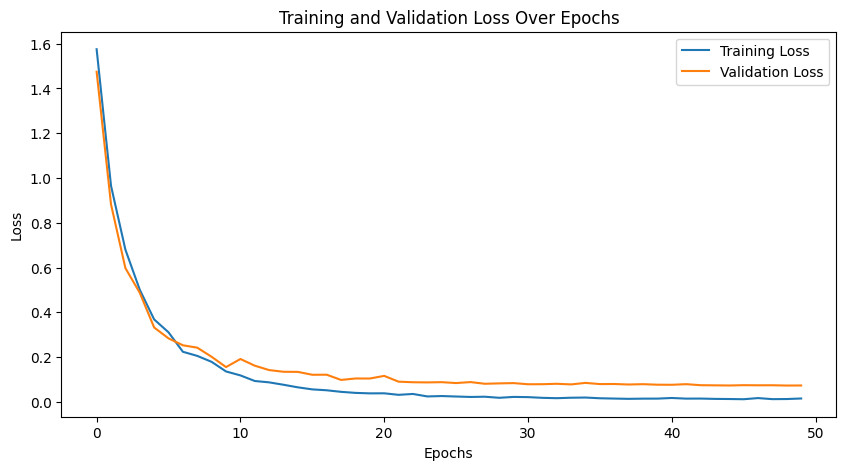

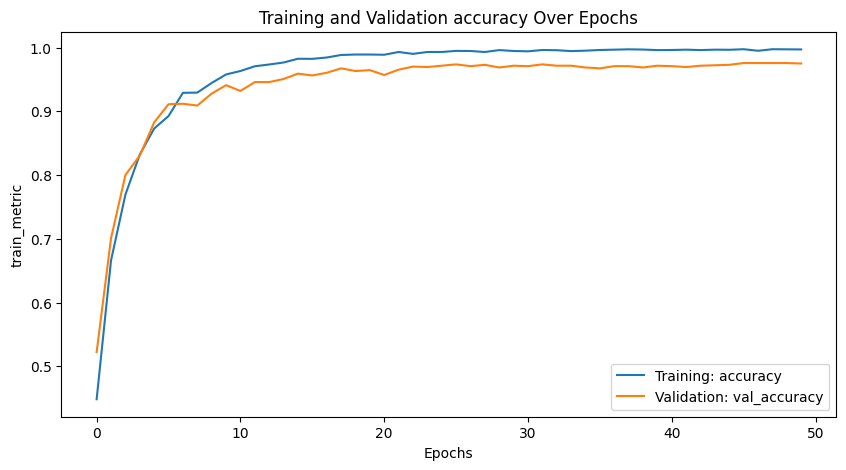

In [34]:
#Modelin eƒüitim s√ºrecinde kaydedilen performans bilgilerini grafiksel olarak g√∂sterir.
plot_training_history(history)

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 üìå Bu grafiklerde modelin eƒüitim ve doƒürulama s√ºreci boyunca kayƒ±p (loss) ve doƒüruluk (accuracy) deƒüerlerinin deƒüi≈üimi g√∂zlemleniyor. <br><br> 
    Eƒüitim ve Doƒürulama Kayƒ±plarƒ± (Training and Validation Loss Over Epochs) ve Eƒüitim ve Doƒürulama Doƒüruluƒüu (Training and Validation Accuracy Over Epochs) grafiklerinde, bazƒ± epochlarda  hem kayƒ±plarda hem de doƒürulukta k√º√ß√ºk dalgalanmalar g√∂zlemlenmektedir. Bu dalgalanmalr modelin √∂ƒürenme s√ºrecinde yaptƒ±ƒüƒ± optimizasyonlardan (√∂rneƒüin, batch normalization veya dropout) kaynaklanabilir ve tamamen normal bir durumdur.<br><br> 
    Epoch'lar ilerledik√ße, hem eƒüitim hem de doƒürulama setlerindeki kayƒ±plarƒ±n azaldƒ±ƒüƒ±nƒ± ve neredeyse sabitlendiƒüini g√∂r√ºyoruz. Aynƒ± ≈üekilde, doƒüruluk (accuracy) deƒüerleri de artƒ±yor ve birbirine yakƒ±n seviyelerde sabitleniyor. Bu durum, modelin hem eƒüitim hem de doƒürulama verisi √ºzerinde dengeli bir performans sergilediƒüini ve a≈üƒ±rƒ± √∂ƒürenme (overfitting) yapmadƒ±ƒüƒ±nƒ± g√∂steriyor. Modelin genel olarak iyi bir ≈üekilde √∂ƒürenip genelleme yapabildiƒüini s√∂yleyebiliriz.<br><br>  
    </p>
    
    

In [35]:
test_result = initial_model.evaluate(x_test, verbose=0)
print('Test loss is : ',test_result[0])
print('Test accuracy is : ',test_result[1])

Test loss is :  0.06684382259845734
Test accuracy is :  0.9822221994400024


In [37]:
initial_model.save_weights("my_model.weights.h5")

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
  Bu kod modelin test veri seti √ºzerindeki performansƒ±nƒ± √∂l√ßmek ve bu doƒüruluƒüu kullanƒ±cƒ±ya g√∂stermek i√ßin kullanƒ±lƒ±yor. B√∂ylece modelin test verisi √ºzerindeki genel performansƒ±nƒ± deƒüerlendirebiliriz.<br><br>
    Girilen parametrelerin a√ßƒ±klamalarƒ± ≈üu ≈üekildedir:<br><br>
        ‚Ä¢  <span style="font-weight: bold;">initial_model nesnesi,</span>  evaluate metodunu kullanarak test verisi √ºzerindeki modelin performansƒ±nƒ± hesaplar ve kayƒ±p (loss) ve doƒüruluk (accuracy) deƒüerlerini d√∂nd√ºr√ºr.<br><br> 
        ‚Ä¢  <span style="font-weight: bold;">verbose=0 parametresi,</span> fdeƒüerlendirme i≈ülemi sƒ±rasƒ±nda herhangi bir ilerleme √ßubuƒüu veya detaylƒ± √ßƒ±ktƒ±nƒ±n ekrana yazƒ±lmasƒ±nƒ± engeller (sessiz modda √ßalƒ±≈ütƒ±rƒ±r).<br><br> 
    " test_result " bir liste ≈üeklinde bir deƒüi≈ükendir. Bu liste, modelin test veri seti √ºzerindeki performansƒ±nƒ± g√∂steren deƒüerleri i√ßerir.<br><br> 
        ‚Ä¢  <span style="font-weight: bold;">test_result[0]:</span> Bu, test verisi √ºzerindeki kayƒ±p (loss) deƒüeridir. Yani modelin tahmin ettiƒüi sonu√ßlar ile ger√ßek deƒüerler arasƒ±ndaki farkƒ± √∂l√ßen deƒüerdir.<br><br> 
     ‚Ä¢  <span style="font-weight: bold;">test_result[1]:</span> Bu, test verisi √ºzerindeki doƒüruluk (accuracy) deƒüeridir. Modelin test setinde ka√ß tane √∂rneƒüi doƒüru tahmin ettiƒüini y√ºzdesel olarak g√∂sterir<br><br>     
    </p>

57/57 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 400ms/step


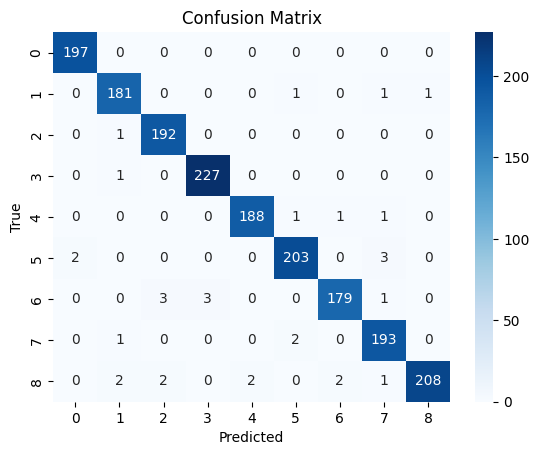

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       197
           1       0.97      0.98      0.98       184
           2       0.97      0.99      0.98       193
           3       0.99      1.00      0.99       228
           4       0.99      0.98      0.99       191
           5       0.98      0.98      0.98       208
           6       0.98      0.96      0.97       186
           7       0.96      0.98      0.97       196
           8       1.00      0.96      0.98       217

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800



In [38]:
# Confusion Matrix ve Classification Report
y_pred = initial_model.predict(x_test)  # Test verisi √ºzerindeki tahminlerin alƒ±nmasƒ±

y_pred_classes = np.argmax(y_pred, axis=1) # En y√ºksek olasƒ±lƒ±ƒüa sahip sƒ±nƒ±fƒ± almak (her √∂rnek i√ßin tahmin edilen sƒ±nƒ±f)

y_true_classes = x_test.classes  # Ger√ßek sƒ±nƒ±f deƒüerlerini almak

conf_mat = confusion_matrix(y_true_classes, y_pred_classes) # Karma≈üƒ±klƒ±k matrisini olu≈üturmak

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d') # Karma≈üƒ±klƒ±k matrisinin g√∂rselle≈ütirilmesi
plt.xlabel('Predicted')  # X eksenine tahmin edilen sƒ±nƒ±flar etiketi eklemek
plt.ylabel('True')  # Y eksenine ger√ßek sƒ±nƒ±flar etiketi eklemek
plt.title('Confusion Matrix')   # Grafiƒüin ba≈ülƒ±ƒüƒ±nƒ± eklemek

plt.show()

print(classification_report(y_true_classes, y_pred_classes)) # Sƒ±nƒ±flandƒ±rma raporunu ekrana yazdƒ±rmak (precision, recall, f1-score, support)


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 üìå Confusion matrix kullanarak, modelin her sƒ±nƒ±f i√ßin ne kadar doƒüru ve ne kadar yanlƒ±≈ü tahmin yaptƒ±ƒüƒ±nƒ± g√∂zlemleyebiliriz. <br>Bu tablo, modelin sƒ±nƒ±flar arasƒ±ndaki performansƒ±nƒ± ayrƒ±ntƒ±lƒ± bir ≈üekilde anlamamƒ±za yardƒ±mcƒ± olur. <br>Modelimizin deƒüerlendirme metriki olarak accuracy deƒüerine baktƒ±ƒüƒ±mƒ±zda, bu oran %98 olarak kar≈üƒ±mƒ±za √ßƒ±kƒ±yor. Bu da demek oluyor ki, modelimiz elindeki 100 balƒ±k resminden 98'ini doƒüru ≈üekilde sƒ±nƒ±flandƒ±rabilmi≈ü. <br> Bu doƒüruluk oranƒ±, modelimizin genel olarak balƒ±k t√ºrlerini b√ºy√ºk oranda doƒüru tanƒ±dƒ±ƒüƒ±nƒ± ve iyi bir genelleme kapasitesine sahip olduƒüunu g√∂steriyor. <br>Yani sƒ±nƒ±flandƒ±rma g√∂revinde etkili bir performans sergilediƒüini s√∂yleyebiliriz.<br><br>    
   üìå Precision, Recall, F1-Score deƒüerleri de her bir sƒ±nƒ±f i√ßin olduk√ßa y√ºksektir. Bu durum, modelin her bir sƒ±nƒ±fƒ± doƒüru ve dengeli bir ≈üekilde tahmin edebildiƒüini g√∂steriyor.<br><br>  
    </p>

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
<span style="font-weight: bold;">Veri Setimiz Dengesiz Olsaydƒ±, Yine Model Ba≈üarƒ± Deƒüerlendirme Metriƒüi olarak Accuracy'yi Mi Kullanmalƒ±ydƒ±k? üßê</span> <br><br> 
 üìå Burada √∂nemli bir noktaya deƒüinmek istiyorum. Veri setimiz dengeli, yani her sƒ±nƒ±fƒ±n yakla≈üƒ±k olarak e≈üit sayƒ±da g√∂zlem birimi var. Bu nedenle, accuracy metriƒüi modelimizin performansƒ±nƒ± deƒüerlendirmek i√ßin mantƒ±klƒ± ve yeterli bir √∂l√ß√ºt olarak kullanƒ±lƒ±yor. Ancak, eƒüer veri setimiz dengesiz olsaydƒ±, yani bazƒ± sƒ±nƒ±flarƒ±n diƒüerlerine g√∂re √ßok daha fazla ya da az sayƒ±da olduƒüu bir durum olsaydƒ±, accuracy metriƒüi yanƒ±ltƒ±cƒ± olabilirdi. √á√ºnk√º √ßoƒüunluk sƒ±nƒ±fƒ±nƒ± doƒüru tahmin ederek y√ºksek bir doƒüruluk elde etmek kolaydƒ±r; fakat bu durum diƒüer sƒ±nƒ±flarƒ± ihmal etmek anlamƒ±na gelebilir. <br><br>  
   üìå Bu nedenle, dengesiz veri setlerinde F1 skoru gibi metrikleri kullanmak daha uygun olacaktƒ±r. F1 skoru, precision (kesinlik) ve recall (duyarlƒ±lƒ±k) arasƒ±ndaki dengeyi alarak, √∂zellikle dengesiz sƒ±nƒ±flar arasƒ±nda daha dengeli bir performans deƒüerlendirmesi saƒülar. B√∂ylece modelin, az temsil edilen sƒ±nƒ±flarda da ne kadar ba≈üarƒ±lƒ± olduƒüunu daha net g√∂rebiliriz.<br><br>  
    </p>
    

<a class="anchor" id="read"></a>

## <span style="color:#FA8072"> Hyperparameter Tuning (Hiperparametre Ayarlama) </span> <a class="anchor" id="load_data"></a>


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 üìå Hyperparameter tuning (hiperparametre ayarlama) s√ºrecinde, modelin eƒüitim s√ºresini minimize etmek amacƒ±yla Random Search metodu kullanƒ±ldƒ±. Random Search, hiperparametre uzayƒ±ndan rastgele √∂rnekler se√ßerek arama yapar ve genellikle belirli bir zaman sƒ±nƒ±rlamasƒ± olduƒüunda veya arama uzayƒ±nƒ±n √ßok b√ºy√ºk olduƒüu durumlarda tercih edilir. Bu metodun yerine Grid Search veya Bayesian Search gibi diƒüer y√∂ntemler de kullanƒ±labilirdi. Her bir metodun avantaj ve dezavantajlarƒ±na deƒüinecek olursak: <br><br>  
     ‚Ä¢  <span style="font-weight: bold;">1. Random Search:</span> Arama uzayƒ± √ßok b√ºy√ºk olduƒüunda, rastgele se√ßimler sayesinde daha kƒ±sa s√ºrede sonu√ßlara ula≈üƒ±labilir. Fakat, optimum √ß√∂z√ºme ula≈üma garantisi yoktur: Parametre uzayƒ±nda sadece rastgele √∂rnekleme yapƒ±ldƒ±ƒüƒ±ndan, bazƒ± √∂nemli b√∂lgeler g√∂z ardƒ± edilebilir ve optimum √ß√∂z√ºme ula≈üamayabilir.<br><br> 
     ‚Ä¢  <span style="font-weight: bold;">2. Grid Search:</span> Belirlenen hiperparametre kombinasyonlarƒ±nƒ±n tamamƒ± taranƒ±r ve bu sayede optimum sonuca ula≈üma olasƒ±lƒ±ƒüƒ± y√ºksektir. Fakat, arama uzayƒ± b√ºy√ºkse, deneme sayƒ±sƒ± katlanarak artar ve bu da √ßok fazla zaman ve hesaplama g√ºc√º gerektirir.<br><br> 
         ‚Ä¢  <span style="font-weight: bold;">3. Bayesian Optimization:</span> √ñnceki denemelerden elde edilen sonu√ßlara dayalƒ± olarak hiperparametre aramasƒ±nƒ± optimize eder ve b√∂ylece daha az denemeyle iyi sonu√ßlara ula≈üabilir. Bu y√∂ntem, Grid Search'e kƒ±yasla daha az denemeyle iyi sonu√ßlara ula≈ümayƒ± saƒülar ve √∂zellikle arama uzayƒ± b√ºy√ºk olduƒüunda zamandan tasarruf edebilir. Ancak, yine de √ßok b√ºy√ºk arama uzaylarƒ±nda denemeler uzun s√ºrebilir ve bu da y√ºksek hesaplama g√ºc√º gerektirebilir.<br><br>     
    ‚úÖYapmƒ±≈ü olduƒüum Random Search ile yapƒ±lan hiperparametre aramalarƒ±nda modelde belirgin bir iyile≈üme g√∂zlenmemi≈ütir. Bu durum, Random Search'√ºn beklenen bir sonucudur, √ß√ºnk√º bu y√∂ntem genellikle arama uzayƒ±nƒ± rastgele taradƒ±ƒüƒ± i√ßin en iyi hiperparametre kombinasyonunu bulmak her zaman garanti deƒüildir.<br><br>   
    </p>

In [39]:
# Hiperparametre optimizasyonu i√ßin modelin olu≈üturulmasƒ±
# Bu fonksiyon, belirli hiperparametrelerle bir model olu≈üturur ve modelin √ße≈üitli yapƒ±landƒ±rma se√ßeneklerini test eder.
# Hyperparameter tuning sƒ±rasƒ±nda kullanƒ±lƒ±r ve modelin performansƒ±nƒ± en √ºst d√ºzeye √ßƒ±karmak ama√ßlanƒ±r.

def build_model(hp):
    model = Sequential()
    
    # Rescaling layer: Giri≈ü verilerini normalle≈ütirir ve 0-1 aralƒ±ƒüƒ±na getirir.
    model.add(Rescaling(1./255))
    
    # Flatten layer: Giri≈ü verilerini tek boyutlu bir vekt√∂re d√∂n√º≈üt√ºrerek gizli katmanlara aktarƒ±r.
    model.add(Flatten(input_shape=(224, 224, 3)))

    # Hidden layers: Belirli hiperparametrelere g√∂re deƒüi≈üen n√∂ron sayƒ±sƒ±, aktivasyon fonksiyonu, regularizasyon ve dropout ile gizli katmanlar olu≈üturur.
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(#Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32),
                  Dense(units=hp.Choice('units_' + str(i), values=[64, 128]),
                        activation=hp.Choice('activation_' + str(i), values=['relu', 'leaky_relu']),
                        kernel_regularizer=l2(hp.Float('l2_' + str(i), min_value=0.0001, max_value=0.01, sampling='log'))))
        model.add(BatchNormalization()) # Batch Normalization, aktivasyon sonucu elde edilen deƒüerleri normalize eder
        model.add(Dropout(hp.Float('dropout_' + str(i), min_value=0.1, max_value=0.5, step=0.1))) # Dropout, bazƒ± n√∂ronlarƒ± rastgele devre dƒ±≈üƒ± bƒ±rakƒ±r

    # Output layer: Modelin sƒ±nƒ±flandƒ±rma sonucunu (9 sƒ±nƒ±f) √ºretir.
    model.add(Dense(9, activation='softmax'))

    # Learning rate schedule: √ñƒürenme oranƒ±nƒ± zamanla azaltarak daha etkili ve kararlƒ± bir eƒüitim saƒülar.
    initial_learning_rate = hp.Float('initial_learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    lr_schedule = ExponentialDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=1000,
        decay_rate=0.96,
        staircase=True
    )

    # Optimizer selection: SGD veya Adam gibi optimizasyon algoritmalarƒ±nƒ± se√ßer ve bu algoritmalara √∂zg√º hiperparametreleri ayarlar.
    optimizer_choice = hp.Choice('optimizer', values=['sgd', 'adam'])
    if optimizer_choice == 'sgd':
        optimizer = SGD(
            learning_rate=lr_schedule,
            momentum=hp.Float('momentum', min_value=0.0, max_value=0.9, step=0.1)
        )
    elif optimizer_choice == 'adam':
        optimizer = Adam(
            learning_rate=lr_schedule,
            beta_1=hp.Float('beta1', min_value=0.85, max_value=0.99, step=0.01),
            beta_2=hp.Float('beta2', min_value=0.999, max_value=0.9999, step=0.0001),
            epsilon=hp.Float('epsilon', min_value=1e-8, max_value=1e-7, step=1e-8)
        )

    # Model compilation: Modeli derler ve √∂ƒürenme s√ºrecinde kullanƒ±lacak kayƒ±p fonksiyonu ve metrikleri belirler.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [40]:
random_search_tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=2,
    executions_per_trial=1,
    overwrite=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True)


In [41]:
# Using GPU for training
with tf.device('/GPU:0'):
    random_search_tuner.search(x_train,
                               epochs=50,
                               validation_data=x_val,
                               callbacks=[early_stopping])


Trial 2 Complete [00h 17m 51s]
val_loss: 1.3808337450027466

Best val_loss So Far: 0.6791839599609375
Total elapsed time: 00h 54m 45s


In [42]:
best_hps = random_search_tuner.get_best_hyperparameters(num_trials=2)

In [43]:
best_hps_1 = best_hps[0]
best_hps_2 = best_hps[1]

In [44]:
print(f"Best hyperparameters: {best_hps_1.values}")

Best hyperparameters: {'num_layers': 3, 'units_0': 64, 'activation_0': 'relu', 'l2_0': 0.0030117036523843108, 'dropout_0': 0.4, 'initial_learning_rate': 0.00016899315089921891, 'optimizer': 'adam', 'momentum': 0.7000000000000001, 'units_1': 64, 'activation_1': 'relu', 'l2_1': 0.0001, 'dropout_1': 0.1, 'units_2': 64, 'activation_2': 'relu', 'l2_2': 0.0001, 'dropout_2': 0.1, 'beta1': 0.85, 'beta2': 0.999, 'epsilon': 1e-08}


In [45]:
print(f"Best hyperparameters: {best_hps_2.values}")

Best hyperparameters: {'num_layers': 2, 'units_0': 64, 'activation_0': 'relu', 'l2_0': 0.0012897044683118123, 'dropout_0': 0.30000000000000004, 'initial_learning_rate': 0.0007671854521876099, 'optimizer': 'adam', 'momentum': 0.1, 'units_1': 64, 'activation_1': 'leaky_relu', 'l2_1': 0.0017686030901453863, 'dropout_1': 0.30000000000000004, 'units_2': 128, 'activation_2': 'leaky_relu', 'l2_2': 0.00912470672476799, 'dropout_2': 0.2, 'beta1': 0.99, 'beta2': 0.9997, 'epsilon': 3.0000000000000004e-08}


In [46]:
best_models = random_search_tuner.get_best_models(num_models=2)

In [47]:
for i, model in enumerate(best_models):
    loss, acc = model.evaluate(x_test, verbose=0)
    print(f"Model {i+1}, Validation loss: {loss}, Validation Accuracy: {acc}")

Model 1, Validation loss: 0.7093481421470642, Validation Accuracy: 0.8633333444595337
Model 2, Validation loss: 1.4009442329406738, Validation Accuracy: 0.6911110877990723


<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 üìå G√∂r√ºld√ºƒü√º √ºzere, Random Search ile yapƒ±lan hiperparametre optimizasyonu sonucunda iki model √ºzerinde belirgin bir iyile≈üme g√∂zlenememi≈ütir: <br><br>  
     ‚Ä¢  Model 1: Validation loss: 0.7093, Validation Accuracy: %86.33<br><br> 
     ‚Ä¢ Model 2: Validation loss: 1.4009, Validation Accuracy: %69.11<br><br>      
    ‚úÖBu sonu√ßlar doƒürultusunda, hiperparametre optimizasyonu yapmadan mevcut modelimizle devam ettik ve eƒüitim setindeki sƒ±nƒ±flarƒ± tahmin etmeye odaklandƒ±k. Modelimiz mevcut haliyle test setinde iyi bir performans sergileyerek y√ºksek doƒüruluk oranƒ±na ula≈ümƒ±≈ütƒ±r.<br><br>   
    ‚úÖ Ayrƒ±ca, hiperparametre optimizasyonunda arama uzayƒ±nƒ± dar tutmak zorunda kaldƒ±k. Bunun nedeni, GPU limitlerimize ula≈ütƒ±ƒüƒ±mƒ±z i√ßin daha uzun s√ºren deneyler yapmanƒ±n m√ºmk√ºn olmamasƒ±ydƒ±. Bu kƒ±sƒ±tlamalar nedeniyle, daha geni≈ü bir arama yapamamƒ±≈ü olsak da, model mevcut haliyle tatmin edici sonu√ßlar vermeye devam etmektedir.
    </p>

## FINAL MODEL

<p style="background-color: #FFDAB9; padding: 15px; border-radius: 10px;">
 üìå Bu b√∂l√ºmde, nihai model test edilmi≈ütir.<br>   </p>

In [55]:
initial_model.load_weights('my_model.weights.h5')  # Kaydedilen aƒüƒ±rlƒ±klarƒ± y√ºkl√ºyoruz

In [56]:
initial_model.summary()  # Modelin √∂zetini (katman yapƒ±sƒ±nƒ±) yazdƒ±rƒ±yoruz

Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ rescaling_1 (Rescaling)         ‚îÇ (None, 224, 224, 3)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_1 (Flatten)             ‚îÇ (None, 150528)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 256)            ‚îÇ    38,535,424 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3           ‚îÇ (None, 256)            ‚îÇ         1,024 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_4           ‚îÇ (None, 128)            ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 128)            ‚îÇ        16,512 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_5           ‚îÇ (None, 128)            ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 9)             

 Total params: 115,762,077 (441.60 MB)

 Trainable params: 38,587,017 (147.20 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 77,174,036 (294.40 MB)

In [50]:
test_result = initial_model.evaluate(x_test, verbose=0)
print('Test loss is : ',test_result[0])
print('Test accuracy is : ',test_result[1])

Test loss is :  0.06684382259845734
Test accuracy is :  0.9822221994400024


57/57 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 398ms/step


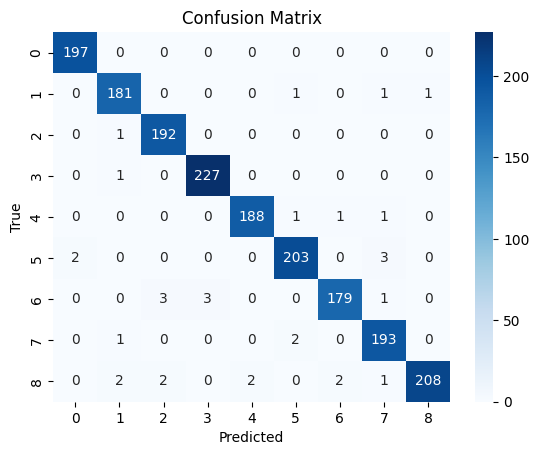

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       197
           1       0.97      0.98      0.98       184
           2       0.97      0.99      0.98       193
           3       0.99      1.00      0.99       228
           4       0.99      0.98      0.99       191
           5       0.98      0.98      0.98       208
           6       0.98      0.96      0.97       186
           7       0.96      0.98      0.97       196
           8       1.00      0.96      0.98       217

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800



In [57]:
# Confusion Matrix ve Classification Report
y_pred = initial_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = x_test.classes

conf_mat = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true_classes, y_pred_classes))

In [58]:
# Test verisini kopyalayƒ±p predict_data adƒ±nda yeni bir DataFrame olu≈üturuyoruz.
predict_data = test_data.copy()

# Bo≈ü bir labels s√∂zl√ºƒü√º tanƒ±mlƒ±yoruz.
labels={}

# Mevcut sƒ±nƒ±f indekslerini tersine √ßevirerek (indeks -> sƒ±nƒ±f etiketi) labels s√∂zl√ºƒü√ºne ekliyoruz.
for l,v in x_test.class_indices.items():
    labels.update({v:l})

# Modelin tahmin ettiƒüi sƒ±nƒ±f indekslerini 'pred' adlƒ± bir s√ºtuna atƒ±yoruz.
predict_data['pred'] = y_pred_classes

# Tahmin edilen sƒ±nƒ±f indekslerini sƒ±nƒ±f etiketlerine √ßeviriyoruz.
predict_data['pred'] = predict_data['pred'].apply(lambda x: labels[x])

In [59]:
# DataFrame'in indekslerini sƒ±fƒ±rlƒ±yoruz, eski indeksleri korumadan (drop=True) yeni bir sƒ±ralƒ± indeks olu≈üturuyoruz.
predict_data = predict_data.reset_index(drop=True)

# ƒ∞lk 10 satƒ±rƒ± g√∂r√ºnt√ºl√ºyoruz, tahmin edilen sonu√ßlarƒ± kontrol etmek i√ßin.
predict_data.head(10)

path               label  \
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...       Red Sea Bream   
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...     Black Sea Sprat   
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Striped Red Mullet   
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...          Red Mullet   
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...     Gilt-Head Bream   
5  /kaggle/input/a-large-scale-fish-dataset/Fish_...       Red Sea Bream   
6  /kaggle/input/a-large-scale-fish-dataset/Fish_...          Red Mullet   
7  /kaggle/input/a-large-scale-fish-dataset/Fish_...       Red Sea Bream   
8  /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
9  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Striped Red Mullet   

                 pred  
0       Red Sea Bream  
1     Black Sea Sprat  
2  Striped Red Mullet  
3          Red Mullet  
4     Gilt-Head Bream  
5       Red Sea Bream  
6          Red Mullet  
7       Red Sea Bream  
8               Trout  
9  Striped Red Mullet

In [60]:
# Ger√ßek etiketler ('label') ile tahmin edilen etiketler ('pred') e≈üle≈ümeyen satƒ±rlarƒ± filtreleyip g√∂steriyoruz.
# Bu sayede modelin yanlƒ±≈ü sƒ±nƒ±flandƒ±rdƒ±ƒüƒ± verileri g√∂rebiliriz.

predict_data[predict_data['label']!=predict_data['pred']]

path               label  \
14    /kaggle/input/a-large-scale-fish-dataset/Fish_...            Sea Bass   
138   /kaggle/input/a-large-scale-fish-dataset/Fish_...       Red Sea Bream   
145   /kaggle/input/a-large-scale-fish-dataset/Fish_...            Sea Bass   
150   /kaggle/input/a-large-scale-fish-dataset/Fish_...              Shrimp   
214   /kaggle/input/a-large-scale-fish-dataset/Fish_...     Gilt-Head Bream   
297   /kaggle/input/a-large-scale-fish-dataset/Fish_...              Shrimp   
324   /kaggle/input/a-large-scale-fish-dataset/Fish_...       Red Sea Bream   
400   /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
503   /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
580   /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
587   /kaggle/input/a-large-scale-fish-dataset/Fish_...     Gilt-Head Bream   
600   /kaggle/input/a-large-scale-fish-dataset/Fish_...              Shrimp   
643   /kaggle/input/a-large-scale-fish-dataset/Fish_...     Hourse Mackerel   
645   /kaggle/input/a-large-scale-fish-dataset/Fish_...            Sea Bass   
669   /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
810   /kaggle/input/a-large-scale-fish-dataset/Fish_...       Red Sea Bream   
826   /kaggle/input/a-large-scale-fish-dataset/Fish_...              Shrimp   
830   /kaggle/input/a-large-scale-fish-dataset/Fish_...              Shrimp   
837   /kaggle/input/a-large-scale-fish-dataset/Fish_...  Striped Red Mullet   
942   /kaggle/input/a-large-scale-fish-dataset/Fish_...            Sea Bass   
1002  /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
1031  /kaggle/input/a-large-scale-fish-dataset/Fish_...              Shrimp   
1072  /kaggle/input/a-large-scale-fish-dataset/Fish_...            Sea Bass   
1122  /kaggle/input/a-large-scale-fish-dataset/Fish_...          Red Mullet   
1152  /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
1455  /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
1475  /kaggle/input/a-large-scale-fish-dataset/Fish_...              Shrimp   
1523  /kaggle/input/a-large-scale-fish-dataset/Fish_...     Gilt-Head Bream   
1599  /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   
1711  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Striped Red Mullet   
1736  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Striped Red Mullet   
1739  /kaggle/input/a-large-scale-fish-dataset/Fish_...               Trout   

                    pred  
14    Striped Red Mullet  
138             Sea Bass  
145      Black Sea Sprat  
150   Striped Red Mullet  
214             Sea Bass  
297           Red Mullet  
324   Striped Red Mullet  
400               Shrimp  
503        Red Sea Bream  
580      Hourse Mackerel  
587                Trout  
600      Hourse Mackerel  
643      Gilt-Head Bream  
645      Black Sea Sprat  
669      Hourse Mackerel  
810               Shrimp  
826           Red Mullet  
830           Red Mullet  
837             Sea Bass  
942   Striped Red Mullet  
1002              Shrimp  
1031     Hourse Mackerel  
1072  Striped Red Mullet  
1122     Gilt-Head Bream  
1152  Striped Red Mullet  
1455       Red Sea Bream  
1475     Hourse Mackerel  
1523  Striped Red Mullet  
1599     Gilt-Head Bream  
1711     Gilt-Head Bream  
1736            Sea Bass  
1739     Gilt-Head Bream

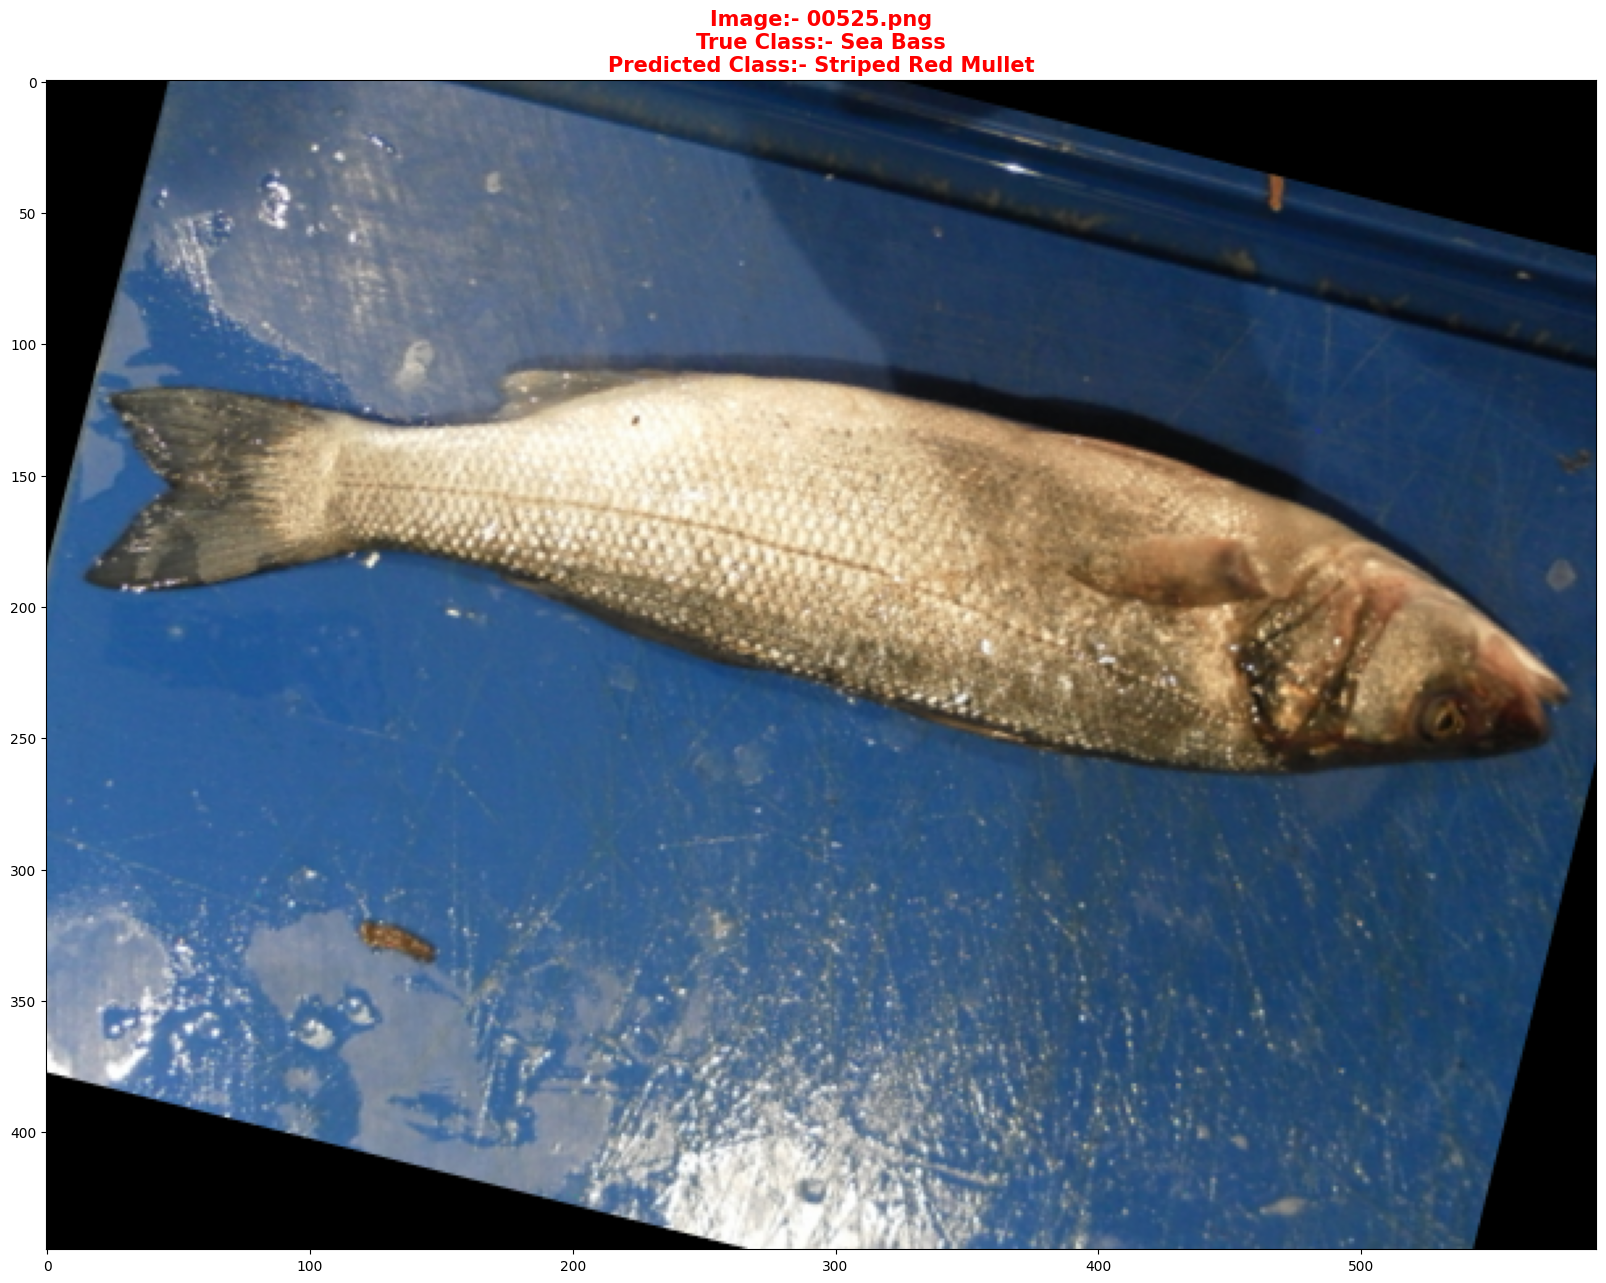

In [63]:
# Modelinin tahmin sonu√ßlarƒ±nƒ± g√∂rselle≈ütirmek ve kar≈üƒ±la≈ütƒ±rmak i√ßin kullanƒ±lƒ±r.

plt.figure(figsize=(20,20))
plt.imshow(plt.imread(predict_data.path[14]))
title1 = predict_data.path[14].split('/')[-2]
title2 = predict_data.path[14].split('/')[-1]
title3 = predict_data.pred[14]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()